Machine Learning applications ultimately boil down to a bunch of matrix multiplication plus some extra stuff. So seeing how it's difficult to multiply strings by strings, it stands to reason that we want to represent our string data in some fashion.

Thankfully Word Embeddings do just this.

## Overview

Say we have a vocabulary, `V`, of 10,000 words that include

    [a, aaron, ..., zulu, <UNK>]
    
(here, `<UNK>` is a stand-in for any words we might not have considered)

Through Word Embedding, each word in our vocabulary gets some n-dimensional vector that repsents the word's meaning. You can construct arbitrarily-many dimensions to represent the word, but intuitively the learned embeddings (more on this below) will represent where the word falls on a number of spectrums, such as:

- hot vs cold
- happy vs sad
- open vs closed

and many, many others. It's also worth noting that these values won't always be human-interpretable.

Expressing a word as its Word Embedding first requires two objects:

#### One-Hot Representation

We can represent any word in this vocabulary as a one-hot vector of length `vocabulary_size` that looks like

    [0 0 0 0 ... 0 0 1 0 0 ... 0 ]
    
If `i` is the list index of the word in question, then the vector is straight `0`s across the board, save for a `1` at the `i`th index.

#### Embedding Matrix

The Embedding Matrix is a `vocabulary_size X enbedding_dimension` size matrix of numbers. For instance, if we wanted a 300-dimensional embedding for the vocabulary outlined above, our Embedding Matrix, `E` would have dimensions `10000 x 300`.

So when we want to extract the Embedding Vector representation of a word, multiply the One Hot Representation by the Embedding Matrix like so

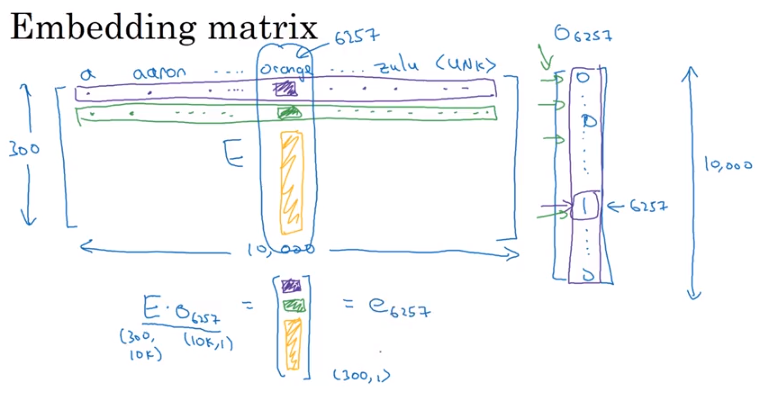

In [1]:
from IPython.display import Image

Image('images/embedding_matrix.png')

In practice, the Embedding Matrix, `E` is instantiated randomly and learned by training. It is also a very sparse matrix, and so we use the `Embedding` object in `keras.layers` to handle efficient calculation for us.

## Training Embeddings

As outlined in course 5 of Andrew Ng's Deep Learning specialization, one approach for training the Embedding Matrix is to programmatically cycle through words 4 at a time, attempting to predict the next. 

Here, we:

- Establish a target word, "juice"
- Generate one-hot representations for "a glass of orange"
- Multiply by `E` to get embedding vectors
- Stack the embedding vectors
- Feed this matrix to a Dense layer and try and predict the word "juice" using a softmax output

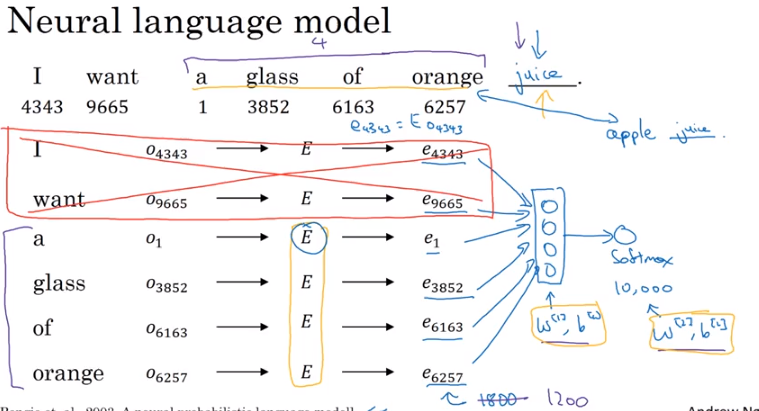

In [2]:
Image('images/learning_embedding.png')

Alternatively, we could try other context/target strategies, such as sandwiching, previous word, or taking an arbitrary number of nearby words (which is more popular in practice)

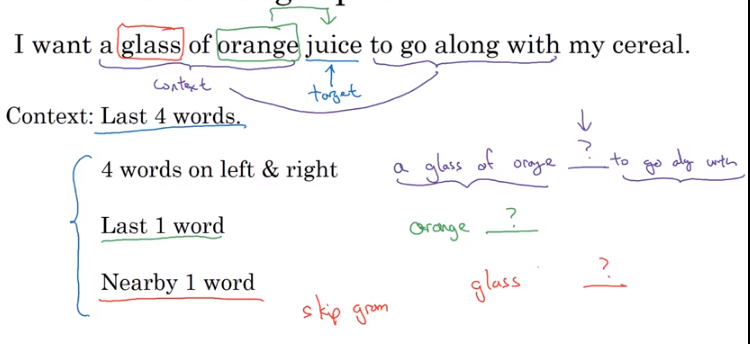

In [3]:
Image('images/other_embedding.png')